# How to: Articulating robotic arm with 2 links and it's range of motion hopefully

In [1]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

Sources:

https://www.youtube.com/@NorthwesternRobotics

https://robotsdoneright.com/Articles/robot-range-of-motion.html

Needed installs for project:
curses
ipympl

### Step 0. Discussing with myself

Q: What do we want to show?

A: The idea is to simulate a robot arm much like the one below with simple vectors in 3D space.

<p>Q: How would we do it?</p>

A: Well i am not currently sure, but we know how to plot vectors and how hard can it be to plot 2 vectors (animate them as well if that is at all possible)

Q: How will it be controlled?

A: The vectors will have relatively simple controls but adding an algorithm that calculates optimal position and angles of the vectors for a given point would be nice.

This is what i imagine under **"robot arm"**, as we can see it has a rotating base, which means we have to be able to rotate the first vector / first link 360° move it up and down. The second vector / second link should be able to move up and down, maybe we could also make it ball jointed much like our shoulder so it's able to move in all sides. 
##### Important things to consider:

The the whole assembly cannot go below the X axis, it's 0 point being represented by the base.

The second link cannot intersect with the first link, much like our elbow we cannot have our robot arm break the joint or the cables connecting it to the base with weird range of motion so we will have a limitation on the degree between the 2 links.

![title](robert.jpg)

Source: https://robotics.stackexchange.com/questions/8717/3-degrees-of-freedom-analytical-solution

# 1. Some information about industrial robots and degrees of freedom

### First of all in our demo, we will completely ignore physical limitations of our robotic arm. By physical limitations i mean power constraints, weight constraints, motor constraints, material constraints, size of links and joints constraints and many more.

The point is to obtain a simple understanding of the robots movement, the algorithms that **could** stay behind it and the theoretical range of motion.

Robots come in many different shapes and sizes, but the one we will be talking about today is a 3 axis robot, being one of the simpler type of industrial robots. Some of the more complex types include a 6 axis robot that closely resembles the freedom of movements of a human arm.

Now about our 3 axis robot, which we will call quite unoriginally so **Robert**. He has 3 axes, each of which contain a joint of some kind: 

| Axis      | Description | Type of joint     |
| :---        |    :----:   |          ---: |
| Axis 1      | Allows 180° linear rotation around the base       | Revolute   |
| Axis 2   |  Forward and backwards motions of the first link        | Revolute      |
| Axis 3   | Forward and backwards motions of the second link        | Revolute      |

The robots movements have degrees of freedom (DOF). DOF represents the **independent** movements a robotic arm can make, each DOF describes an independent type of motion. 

$dof = \sum_{} \text{ freedom of bodies} - 	\#\text{ of independent constraints}$

$N = \#\text{ of bodies, including ground}$

$J = \#\text{ of joints}$

$m = \text{6 for spatial bodies, 3 for planar bodies}$

There is a table showing us the number of constraints for each joint type:

<img src="constraints.png" alt="drawing" width="400"/>

Source: https://medium.com/@khalil_idrissi/degrees-of-freedom-of-a-robot-c21624060d25

And there is a formula for how they are calculated and its called the Grübler's Equation:

$dof = m(N - 1 - J) + \sum_\limits{i=1}^{J}fi $

Lets apply the formula for our robot. First imagining it in 2D space, ignoring our base joint and the rotation it provides, so we have a 2R robot. Meaning 2 revolute joints robot.

$m = 3, N = 3, J = 2$

$dof = 3(3 - 1 - 2) + 2$

$dof = 2$

Seems logical right, according to the table above we have 2 revolute joints, each with 1 dof. First joint between the ground and the first link and the second between the first and second links.

Now lets move on to 3D space and calculate the dof. We have a link between the ground and the first joint (the rotating base), ergo $N$ is increased by 1, even if that links length is 0. 

$m = 6, N = 4, J = 3$

$dof = 6(4 - 1 - 3) + 3$

$dof = 3$

3 revolute joints in 3D space give us a degree of freedom equal to 3.

# 2. Configuration space (C-space)


The configuration space of a robot is a representation of all possible positions and orientations that the robot can achieve. For Robert, the configuration space provides a way to visualize and analyze the possible configurations of the robot in terms of its joint angles. To put it simply it tells us **where the robotic arm is**. Not to be mistaken with **workspace** which describes all the possible positions of the *useful* part of the robot (end-effector), in the case of Robert its the end of the second link, where purely in our imagination we can attach some kind of tool, be it a gripper, welder, cutter, sensor or something of the sort. 

For Robert who has 2 rigid bodies (links) and  in 2D space ignoring the base - the configuration space is every possible combination of angles between the ${X}$ axis and the first link, which we will call ${\theta}_1$ and every possible combination of angles between an imaginary extension of the first link and the second link which we will call ${\theta}_2$. You have to keep in mind that this is the case for **revolute** joints, since revolute joints can be looked at as hinges in their neutral state and hinges have one angle value to represent them, a hinge opened $0{\degree}$ means its closed and vice versa - a hinge opened $180{\degree}$ is opened. Execute the code below to get a visual representation of the angles and links. The orange circles represent all infinite number of joint angles.

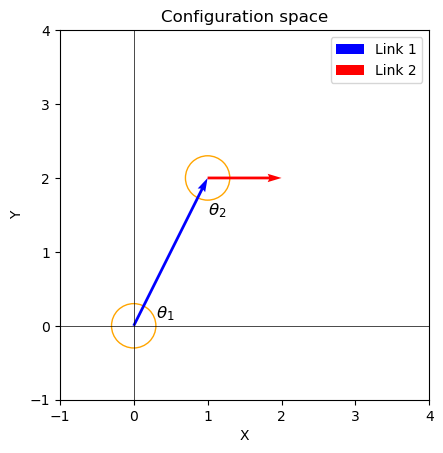

In [2]:
# The links and their x,y values
vector1 = np.array([1, 2])
vector2 = np.array([1, 0])

# Plotting the links
circle1 = plt.Circle((0, 0), radius=0.3, color='orange', fill=False)
circle2 = plt.Circle((vector1[0],vector1[1]), 0.3, color='orange', fill=False)

fig, ax = plt.subplots()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='b', label='Link 1')
ax.quiver(1, 2, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='r', label='Link 2')

# Angle labels
plt.text(0.3, 0.1, r'${\theta}_1$', fontsize=12)
plt.text(1, 1.5, r'${\theta}_2$', fontsize=12)


# Plot beautifying
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Configuration space')
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)

plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


So lets ignore the second link and ${\theta}_2$ making our robot a 1 ${dof}$ and look at the C-space (${C}$) of the first link for a second, pretty obviously it is $360{\degree}$ (a circle - ${S^1}$) and since mathematicians are evil we will use radians from now on and that means the configurations space is $2{\pi}$.

For 1 ${dof}$ robot  ${C_{1dof} = S^1}$

Now lets stop ignoring the second link and we get a C-space of 2 circles.

For 2 ${dof}$ robot  ${C_{2dof} = S^1 \cdot S^2}$

After pieceing up poor Robert we can see that his C-space describes a circle around another circle - donut (for the math nerds - a **torus**) in **2D** space with his 2${dof}$

![title](donut.png)

Source: https://en.wikipedia.org/wiki/Torus

How many ${dof}$ did he have in 3D space? Three so we get this:

For 3 ${dof}$ robot  ${C_{3dof} = S^1 \cdot S^2 \cdot S^3}$

This is a 3-dimensional torus - dont try to imagine it.

Execute the code below and try focusing on the angles and letting that sink in, the workspace of our friend is also shown but it doesn't concern us for now.

In [3]:
def rotate_vector(vector, angle_deg):
    # From degrees to radians
    angle_rad = math.radians(angle_deg)
    x, y = vector
    
    # Coordinates after rotation
    new_x = x * math.cos(angle_rad) - y * math.sin(angle_rad)
    new_y = x * math.sin(angle_rad) + y * math.cos(angle_rad)

    return new_x, new_y

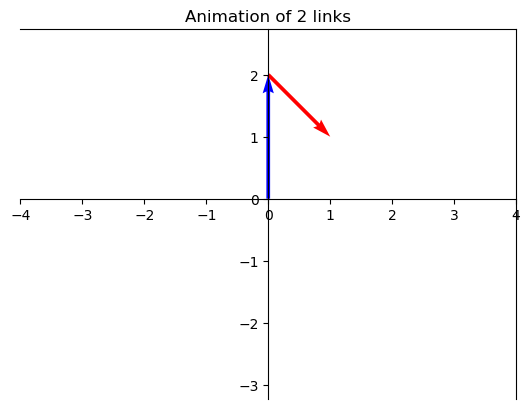

In [11]:
# Create a figure and a line object
fig, ax = plt.subplots()
vectors = np.array([[0.0,0.0,2.0,0.0], [0.0, 0.0, 1.0, 1.0]])
X, Y, U, V = vectors[:, 0], vectors[:, 1], vectors[:, 2], vectors[:, 3]
X, Y, U, V = vectors[:, 0], vectors[:, 1], vectors[:, 2], vectors[:, 3]
colors = [ 'blue','red']

for frame in range(90):
    U,V = rotate_vector([U, V], 5)
    # Assign second vector initial point
    X[1] = U[0]
    Y[1] = V[0]
    U[1],V[1] = rotate_vector([U[1], V[1]], 10)
    # Plotting
    line = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', color=colors, scale=1)
    # Clearing for kind of animation
    ax.relim() 
    clear_output(wait=True)
    display(fig)
    ax.cla()

    # Make it nice
    ax.set_xlim([-4, 4])
    ax.set_ylim([-5.5, 5])
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.axis('equal')
    plt.title('Animation of 2 links')

plt.close()  # Close figure when done


### Disclaimer: for rotations and general movement its an industry standard to use matrices, for this perticular plot i used radians.

## Why is this important?

Before moving on to 3D and kinematics i feel like it's important to grasp the concept and understand the fundamentals of robotics. 
Our understanding of C-space is crucial for inverse kinematics, motion planing, collision detection and much more.


# 3. Kinematics

### Kinematics is a branch of physics that deals with motion, but without considering the force that realizes that movement. Fundamentally its about how fast something moves, how it speeds up and how fast it is. In our case it is pretty closelsy related to the end-effector position. To imagine it just move your fist in space and think about the speed, position and how much slower/faster you can move it.

There are some complicated kinematic stuff like trajectory planning and paths but i have no idea how to do that so we are gonna stick to the basics for now. Kinematics are very closely related to matrices, every link represents some kind of a translation matrix and every revolute joint represents a rotation matrix. How does this all come together? Since we are talking about 3D space **IN OUR CASE** we can represent every joint-link combo as seperate frames and a frame is essentialy a cartesian system which originates from the center of the joint. 

There are some rules for the frame assignments:

The $Z$ axes for revolute joints should correspond to the angle of rotation axes, note the MS Paint™ image below the $Z_{2|3}$ axes align with the axis of rotation the joints are rotationg around the $Z$ axis. The $Z_3$ axis for our static gripper does not matter but since we can reduce some calculations if we match it up with the existing ones it corresponds to the last frame with axes $X_2 | Y_2 | Z_2$.

The $X$ axes should point from the frame origin to the next joint, example - $X_2$ pointing towards the end-effector. And if $Z$ axes intersect the $X$ one should be normal to the plane of the one before, note $Z_0$ and $Z_1$ and how $X_0$ and $X_1$ are **NOT** paralell, that is something that we will have to solve with a rotation.

The $Y$ axes are set according to the right hand rule, point the thumb towards the $Z$ axis, the fingets towards the $X$ and the palm should point towards the $Y$.

Sorry for the terrible drawing :^)

![title](FramesRobert1.png)

### Denavit–Hartenberg parameters (DH parameters) - 4 parameters that describe how our frames are attached according to a convention. They are:  
* $a^i$ ​ : Link length (distance between $Z_i$ ​ and $Z_{i+1}$ ​ along $X_i$ ​ )  
* ${\alpha_i}$ : Link twist (angle between $Z_i$ ​ and $Z_{i+1}$ ​ about $X_i$ ​ ) (Try avoiding these)
* $d_i$  : Link offset (distance between $X_i$ ​ and $X_{i+1}$ ​ along $Z_i$ ​ )
* ${\theta_i}$ ​ : Joint angle (angle between $X_i$ ​ and $X_{i+1}$ ​ about $Z_i$ ​ )  

With revolute and prismatic joints 3 of these parameters are always constants, for revolute joints the constant parameters are $d$,$r$ and $\alpha$ and for prismatic joints $\theta$, $r$ and $\alpha$.s

![title](params.png)

Source: https://prajankya.me/dh/

So how does a DH paramater table look, well like this:

<img src="table-example.jpg" alt="drawing" width="400"/>

Source: https://automaticaddison.com/homogeneous-transformation-matrices-using-denavit-hartenberg/

Lets try making one for our beautiful example. I will walk you through with joint $1$. 

First is the $d_1$ parameter, look at the normal axis - $X_{1|2}$ along the $Z_0$ axis and you get the length of $d_1$. 

Second the ${\alpha_1}$ angle, lets look again at the example, focusing on $Z_0$ and $Z_1$ along the $X_1$ axis, by the right hand rule if we rotate it $90\degree$ along the $X$ axis we will normalize it.

Third one: $r_1$ - along $X_0$ look at the distance between $Z_0$ and $Z_1$, its 0 as well. Again the $Z_0$ axis of the frame continues indefinitely.

These were our constants, in revolute/prismatic joints there are always 3 constants and 1 variable.

Foruth one: $\theta_1$ - the angle between $X_0$ and $X_1$, in our example its 0 but consider the rotation of the second joint, $X_1$ will move along with it, so the angle is variable that we label $\theta_1$

| Joint i | ${\theta_i}$ (angle) | ${\alpha_i}$ (angle)     | $r_i$ (length)    | $d_i$ (length)    |
| :---    |    :----:            |     :---:                |         ---:      |          ---:     |
| 1       |   $\theta_1$         | ${90\degree}$            | 0                 | $L_1$              |
| 2       |   $\theta_2$         | 0                        | $L_2$             | 0                 |
| 3       |   $\theta_3$         | 0                        | $L_3$             | 0                 |


Thats our DH table, you should be able to understand what the values mean and how are they calculated. Based on this table we will construct our transformation matrix for forward kinematics.

>

# 3.1. Forward Kinematics
### Used to obtain the end-effector position position from the parameters of the joints and links

To do that we must move from the first frame to the last frame, by applying the apporpirate transformations, a transformation from frame 0 to frame 1, from frame 1 to frame 2 etc. To find the transformation that describes going from frame $0$ to the end-effector frame $4$ we have to use this formula:

$\prescript{0}{n}{T} = \prescript{0}{1}{T}  \cdot  \prescript{1}{2}{T}  \cdot  \prescript{2}{3}{T} ... \prescript{n-1}{n}{T}$

And to get each transformation we use this one:

$\prescript{i-1}{i}{T} = R_x(\alpha_{i-1}) \cdot D_x(r_{i-1}) \cdot R_z(\theta_i) \cdot D_z(d_i)$

$R$ stands for rotation matrix and $D$ for translation.

Lets construct our rotation matrices, i trust you know what a matrix is:

$$\prescript{0}{1}{T} = R_z(\theta_1) \cdot D_z(L_1) \cdot R_x(90\degree) = 
\left( \begin{matrix}
\cos(\theta_2) & -\sin(\theta_2) &        0        & 0\\\
\sin(\theta_2) &  \cos(\theta_2) &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right) \cdot
D_z(L_1) \cdot 
\left( \begin{matrix}
       1       &         0       &        0        & 0\\\
       0       &         0       &       -1        & 0\\ 
       0       &         1       &        0        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right) 
= \left( \begin{matrix}
    \cos(\theta_2)       &         0             &        \sin(\theta_2)        & 0\\\
    \sin(\theta_2) &         0                   &       -\cos(\theta_2)     & 0\\ 
       0           &         1                   &           0               & L1 \\ 
       0           &         0                   &           0               & 1 \\
\end{matrix}\right)
$$

$$\prescript{1}{2}{T} = R_z(\theta_2) \cdot D_x(L2) = \left( \begin{matrix}
\cos(\theta_2) & -\sin(\theta_2) &        0        & 0\\\
\sin(\theta_2) &  \cos(\theta_2) &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right) \cdot
\left( \begin{matrix}
       1       &         0       &        0        & L2\\\
       0       &         1       &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right)=
\left( \begin{matrix}
\cos(\theta_2) & -\sin(\theta_2) &        0        & L2\\\
\sin(\theta_2) &  \cos(\theta_2) &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right)
$$

$$\prescript{2}{3}{T} = R_z(\theta_3) \cdot D_x(L3) = \left( \begin{matrix}
\cos(\theta_3) & -\sin(\theta_3) &        0        & 0\\\
\sin(\theta_3) &  \cos(\theta_3) &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right) \cdot
\left( \begin{matrix}
       1       &         0       &        0        & L3\\\
       0       &         1       &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right)=
\left( \begin{matrix}
\cos(\theta_3) & -\sin(\theta_3) &        0        & L3\\\
\sin(\theta_3) &  \cos(\theta_3) &        0        & 0\\ 
       0       &         0       &        1        & 0 \\ 
       0       &         0       &        0        & 1 \\
\end{matrix}\right)
$$

And finally to get the transformation matrix that shows you the position of the end-effector:  
$$\prescript{0}{3}{T} = \prescript{0}{1}{T} \cdot \prescript{1}{2}{T} \cdot \prescript{2}{3}{T}$$

In [5]:
# This is literally the T from 0 to 1 in code it is the exact same thing.
def transformation_frame_1(theta1, L1):
    theta1 = np.radians(theta1)
    # 90 degrees rotation matrices are rather simple to fill out 
    rotationX     =      np.array([  [  1.0,               0.0,                0.0,              0.0],
                                     [  0.0,               0.0,               -1.0,              0.0],
                                     [  0.0,               1.0,                0.0,              0.0],
                                     [  0.0,               0.0,                0.0,              1.0]])
    
    rotationZ     =      np.array([  [  np.cos(theta1), -np.sin(theta1),       0.0,              0.0],
                                     [  np.sin(theta1),  np.cos(theta1),       0.0,              0.0],
                                     [  0.0,               0.0,                1.0,              0.0],
                                     [  0.0,               0.0,                0.0,              1.0]])

    translationZ  =      np.array([  [  1.0,               0.0,                0.0,              0.0 ],
                                     [  0.0,               1.0,                0.0,              0.0 ],
                                     [  0.0,               0.0,                1.0,            float(L1) ],
                                     [  0.0,               0.0,                0.0,              1.0 ]])

    T1 = np.dot(rotationZ, translationZ);
    return np.dot(T1, rotationX)

def transformation_frame_2(theta2, L2):
    theta2 = np.radians(theta2)
    rotationZ2     =      np.array([ [  np.cos(theta2), -np.sin(theta2),       0.0,              0.0],
                                     [  np.sin(theta2),  np.cos(theta2),       0.0,              0.0],
                                     [  0.0,               0.0,                1.0,              0.0],
                                     [  0.0,               0.0,                0.0,              1.0]])
    
    translationX2  =      np.array([ [  1.0,               0.0,                0.0,           float(L2) ],
                                     [  0.0,               1.0,                0.0,              0.0 ],
                                     [  0.0,               0.0,                1.0,              0.0 ],
                                     [  0.0,               0.0,                0.0,              1.0 ]])

    
    return np.dot(rotationZ2, translationX2)

def transformation_frame_3(theta3, L3):
    theta3 = np.radians(theta3)
    rotationZ3     =      np.array([ [  np.cos(theta3), -np.sin(theta3),       0.0,              0.0],
                                     [  np.sin(theta3),  np.cos(theta3),       0.0,              0.0],
                                     [  0.0,               0.0,                1.0,              0.0],
                                     [  0.0,               0.0,                0.0,              1.0]])
    
    translationX3  =      np.array([ [  1.0,               0.0,                0.0,           float(L3) ],
                                     [  0.0,               1.0,                0.0,              0.0 ],
                                     [  0.0,               0.0,                1.0,              0.0 ],
                                     [  0.0,               0.0,                0.0,              1.0 ]])

    return np.dot(rotationZ3, translationX3)

def forward_kinematics_calculation(theta1, theta2, theta3, L1, L2, L3):
    T1 = transformation_frame_1(theta1, L1)
    T2 = transformation_frame_2(theta2, L2)
    T3 = transformation_frame_3(theta3, L3)
    T0_2 = np.dot(T1, T2)

    T0_3 = np.dot(T0_2, T3)
    return np.round(T0_3, 2);

### After determining our transformation matrices we can move on to some demos, the code below will show you what forward kinematics are all about.

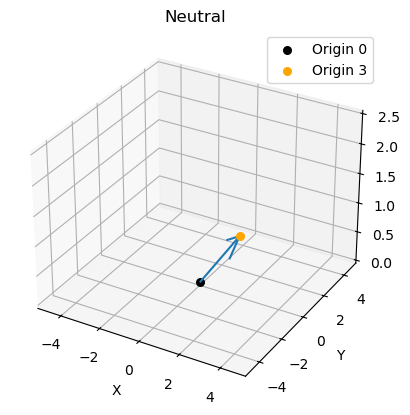

End ef:
2.0 0.0 1.0


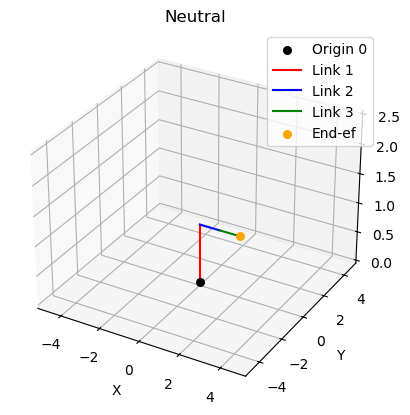

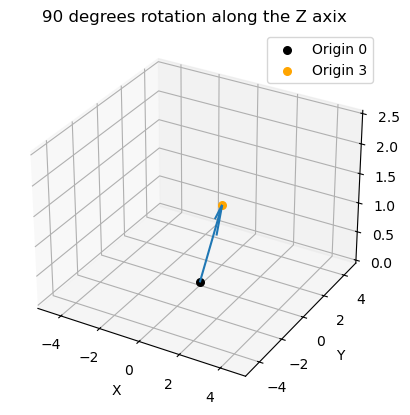

End ef:
0.0 2.0 1.0


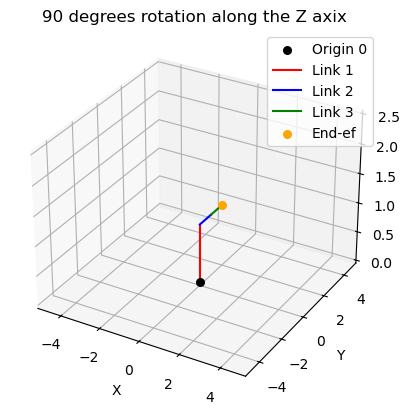

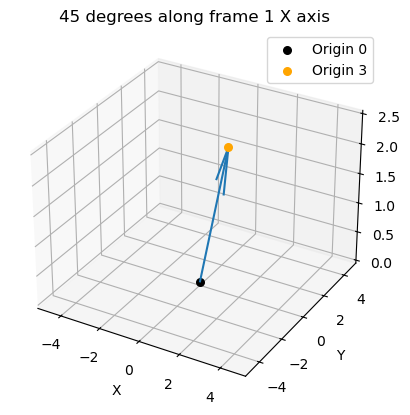

End ef:
1.41 0.0 2.41


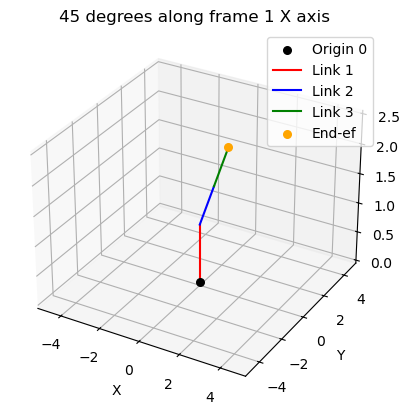

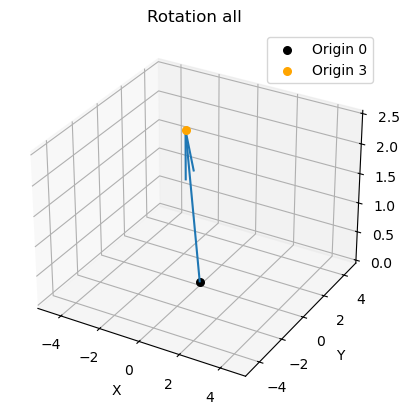

End ef:
-0.35 -0.61 2.62


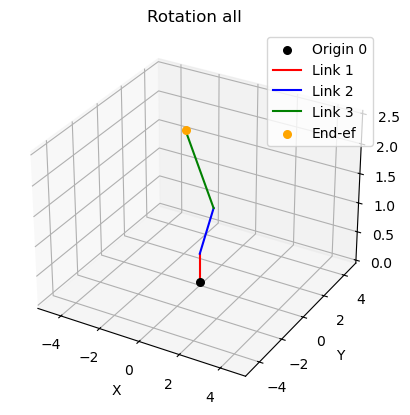

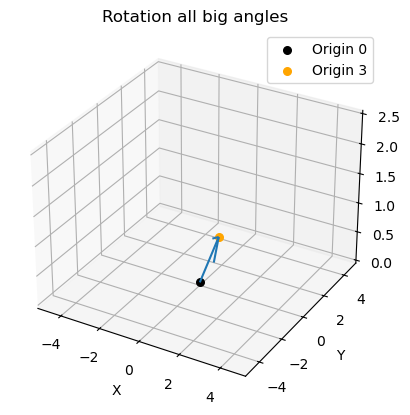

End ef:
1.82 -1.53 1.23


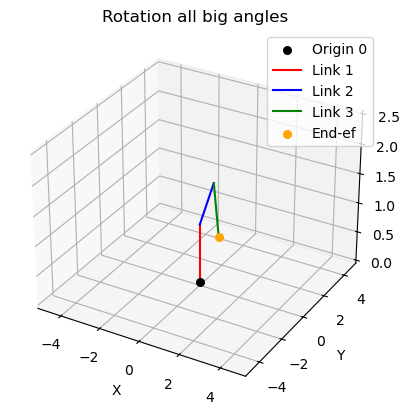

In [6]:
def axisBeautify(ax, title):
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([0, 2.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    return ax
    
def plot_vectors_forward_kinematics(theta1, theta2, theta3, L1, L2, L3, title):
    # Origin
    origin = [0,0,0,1]
    # Coordinates first link
    T1 = forward_kinematics_calculation(theta1, 0, 0, L1, 0, 0)
    O1 = T1[:3, 3]
    x1, y1, z1 = O1[0], O1[1], O1[2]

    # Coordinates second link
    T2 = forward_kinematics_calculation(theta1, theta2, 0, L1, L2, 0)
    O2 = T2[:3, 3]
    x2, y2, z2 = O2[0], O2[1], O2[2]
    
    # Coordinates third link
    T3 = forward_kinematics_calculation(theta1, theta2, theta3, L1, L2, L3)
    O3 = T3[:3, 3]
    x3, y3, z3 = O3[0], O3[1], O3[2]
    
    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot origin
    ax.scatter(0, 0, 0, color='k', s=30, label='Origin 0')
    # Plot links
    ax.plot([0, x1], [0, y1], [0, z1], color='r', label='Link 1')
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='b', label='Link 2')
    ax.plot([x2, x3], [y2, y3], [z2, z3], color='g', label='Link 3')

    # Plot end-effector origin
    ax.scatter(x3, y3, z3, color='orange', s=30, label='End-ef')
    print('End ef:')
    print(x3, y3, z3)
    axisBeautify(ax, title)
    ax.legend()
    plt.show()
    
def plot_moved_origin_FK(theta1, theta2, theta3, L1, L2, L3, title):
    T = forward_kinematics_calculation(theta1, theta2, theta3, L1, L2, L3)
    origin = [0, 0, 0, 1] # This is the origin of frame 0
    origin = np.dot(T, origin) # With this transformation we are moving it to the origin of the last frame
    origin = np.delete(origin, 3) # Remove the part for homogenization

    vector = np.append([0,0,0], origin) # Add a beginning of our vector and plot it to the end effector origin
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.quiver(vector[0], vector[1], vector[2], vector[3], vector[4], vector[5], pivot='tail')
    
    ax.scatter(0, 0, 0, color='k', s=30, label='Origin 0')
    ax.scatter(vector[3], vector[4], vector[5], color='orange', s=30, label='Origin 3')
    ax.legend()
    axisBeautify(ax, title)
    plt.show()

# Play with theese to understand how our origin is moved
plot_moved_origin_FK(0, 0, 0, 1, 1, 1, 'Neutral')
plot_vectors_forward_kinematics(0, 0, 0, 1, 1, 1, 'Neutral')

plot_moved_origin_FK(90, 0, 0, 1, 1, 1, '90 degrees rotation along the Z axix') # Rotation of the whole robot by 90 degrees along the Z axis
plot_vectors_forward_kinematics(90, 0, 0, 1, 1, 1, '90 degrees rotation along the Z axix')

plot_moved_origin_FK(0, 45, 0, 1, 1, 1, '45 degrees along frame 1 X axis')# Rotation of the first link by 45 degrees along frame 1 X axis
plot_vectors_forward_kinematics(0, 45, 0, 1, 1, 1, '45 degrees along frame 1 X axis')

plot_moved_origin_FK(60, 45, 90, 0.5, 1, 2, 'Rotation all')# Rotation of the first link by 45 degrees along frame 1 X axis
plot_vectors_forward_kinematics(60, 45, 90, 0.5, 1, 2, 'Rotation all')

plot_moved_origin_FK(140, 150, 80, 1, 2, 1, 'Rotation all big angles')# Rotation of the first link by 45 degrees along frame 1 X axis
plot_vectors_forward_kinematics(140, 150, 80, 1, 2, 1, 'Rotation all big angles')

You can hopefully understand what forward kinematics are all about.

# 3.2 Inverse Kinematics

In [7]:
import numpy as np

# Define the lengths of the robotic arm segments
L1 = 1.0
L2 = 1.0
L3 = 1.0

# Forward kinematics function
def forward_kinematics(theta):
    theta1, theta2, theta3 = theta
    x = (L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3))
    y = (L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2) + L3 * np.sin(theta1 + theta2 + theta3))
    z = (0)
    return np.array([x, y, z])

# Jacobian function
def jacobian(theta):
    theta1, theta2, theta3 = theta
    J = np.array([
        [-L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2) - L3 * np.sin(theta1 + theta2 + theta3), -L2 * np.sin(theta1 + theta2) - L3 * np.sin(theta1 + theta2 + theta3), -L3 * np.sin(theta1 + theta2 + theta3)],
        [L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3), L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3), L3 * np.cos(theta1 + theta2 + theta3)],
        [0, 0, 0]
    ])
    return J

# Inverse kinematics function
def inverse_kinematics(target, initial_guess, tol=1e-3, max_iterations=1000):
    theta = np.array(initial_guess)
    for _ in range(max_iterations):
        current_position = forward_kinematics(theta)
        error = target - current_position
        if np.linalg.norm(error) < tol:
            break
        J = jacobian(theta)
        d_theta = np.linalg.pinv(J) @ error
        theta += d_theta
    return theta

# Example usage
target_position = np.array([1.5, 1.5, 0])
initial_guess = [0.5, 0.5, 0.5]
joint_angles = inverse_kinematics(target_position, initial_guess)
print("Joint Angles:", joint_angles)


Joint Angles: [-0.14720204  0.88572336  1.06339419]


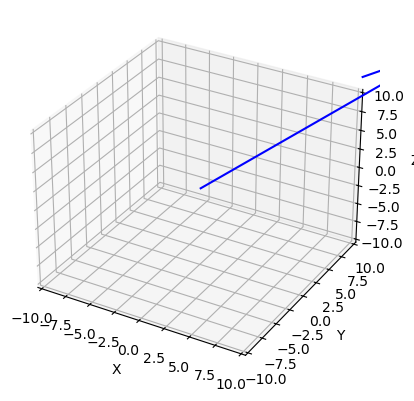

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initial vector
vector = np.array([1, 0, 0])

# Set plot limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Animation loop
for angle in range(15):
    # Set plot limits
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])
    
    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    vector = vector+1
    ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='b')
    clear_output(wait=True)
    display(fig)
    ax.cla()
    
plt.close()

Joint angles solution:
q1: 39.81 degrees
q2: 24.99 degrees
q3: 74.94 degrees
End ef:
1.26 1.05 2.83


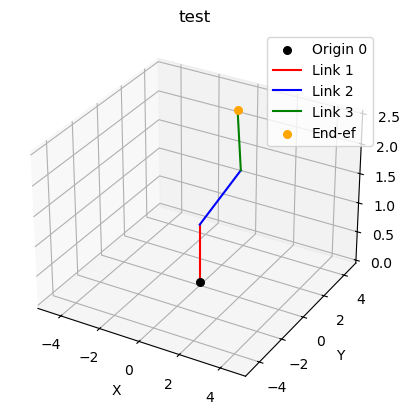

End ef:
1.26 1.05 2.83


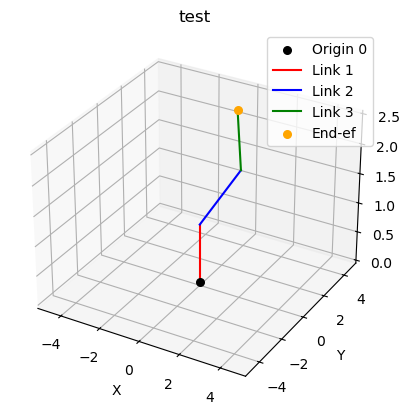

In [27]:
import numpy as np

def inverse_kinematics_3R_geometric(x_d, y_d, z_d, L1, L2, L3):
    # Step 1: Compute q1
    q1 = np.arctan2(y_d, x_d)
    
    # Step 2: Compute r (planar distance in XY-plane)
    r1 = np.linalg.norm(np.array((0, 0)) - np.array((x_d, y_d)))
    r2 = z_d - L1
    r3 = np.linalg.norm(np.array((0, 0, 1)) - np.array((x_d, y_d, z_d)))

    x1 = (L2 ** 2 + r3 ** 2 - L3 ** 2) / (2 * L2 * r3)
    
    phi1 = np.arctan2(r2, r1)
    phi2 = np.arccos(x1)


    x2 = (L2 ** 2 + L3 ** 2 - r3 ** 2) / (2 * L2 * L3)
    phi3 = np.arccos(x2)
    # Convert to degrees
    q1_deg = np.degrees(q1)
    q2_deg = np.degrees(phi1 - phi2)
    q3_deg = np.degrees(phi3)
    
    return q1_deg, q2_deg, 180 - q3_deg

# Example usage
x_d, y_d, z_d = 1.26, 1.05, 2.83
L1 = 1.0
L2 = 2.0
L3 = 1.0

q1, q2, q3 = inverse_kinematics_3R_geometric(x_d, y_d, z_d, L1, L2, L3)
print("Joint angles solution:")
print(f"q1: {q1:.2f} degrees")
print(f"q2: {q2:.2f} degrees")
print(f"q3: {q3:.2f} degrees")

plot_vectors_forward_kinematics(q1,q2, q3, L1, L2, L3, 'test')
plot_vectors_forward_kinematics(40,25, 75, 1, 2, 1, 'test')